# Assignment 1

## Data inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("dataset_mood_smartphone.csv", index_col=0, parse_dates=["time"])
df.head()

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00,mood,6.0
2,AS14.01,2014-02-26 15:00:00,mood,6.0
3,AS14.01,2014-02-26 18:00:00,mood,6.0
4,AS14.01,2014-02-26 21:00:00,mood,7.0
5,AS14.01,2014-02-27 09:00:00,mood,6.0


In [3]:
df.groupby('variable', sort=False).value.describe()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
mood,5641.0,6.992555,1.032769,1.000,7.00000,7.000000,8.000000,10.000
circumplex.arousal,5597.0,-0.098624,1.051868,-2.000,-1.00000,0.000000,1.000000,2.000
circumplex.valence,5487.0,0.687808,0.671298,-2.000,0.00000,1.000000,1.000000,2.000
activity,22965.0,0.115958,0.186946,0.000,0.00000,0.021739,0.158333,1.000
screen,96578.0,75.335206,253.822497,0.035,5.32225,20.044500,62.540250,9867.007
call,5239.0,1.000000,0.000000,1.000,1.00000,1.000000,1.000000,1.000
sms,1798.0,1.000000,0.000000,1.000,1.00000,1.000000,1.000000,1.000
appCat.builtin,91288.0,18.538262,415.989243,-82798.871,2.02000,4.038000,9.922000,33960.246
appCat.communication,74276.0,43.343792,128.912750,0.006,5.21800,16.225500,45.475750,9830.777


In [4]:
# Number of different individuals and the overview statistics for the number of entries
df.groupby('id').count().time.describe()

count       27.000000
mean     13959.703704
std       5118.453040
min       2848.000000
25%      11295.000000
50%      14581.000000
75%      17295.000000
max      21999.000000
Name: time, dtype: float64

In [5]:
df.isnull().any()

id          False
time        False
variable    False
value        True
dtype: bool

In [6]:
df[df.isnull().value].variable.unique()

array(['circumplex.arousal', 'circumplex.valence'], dtype=object)

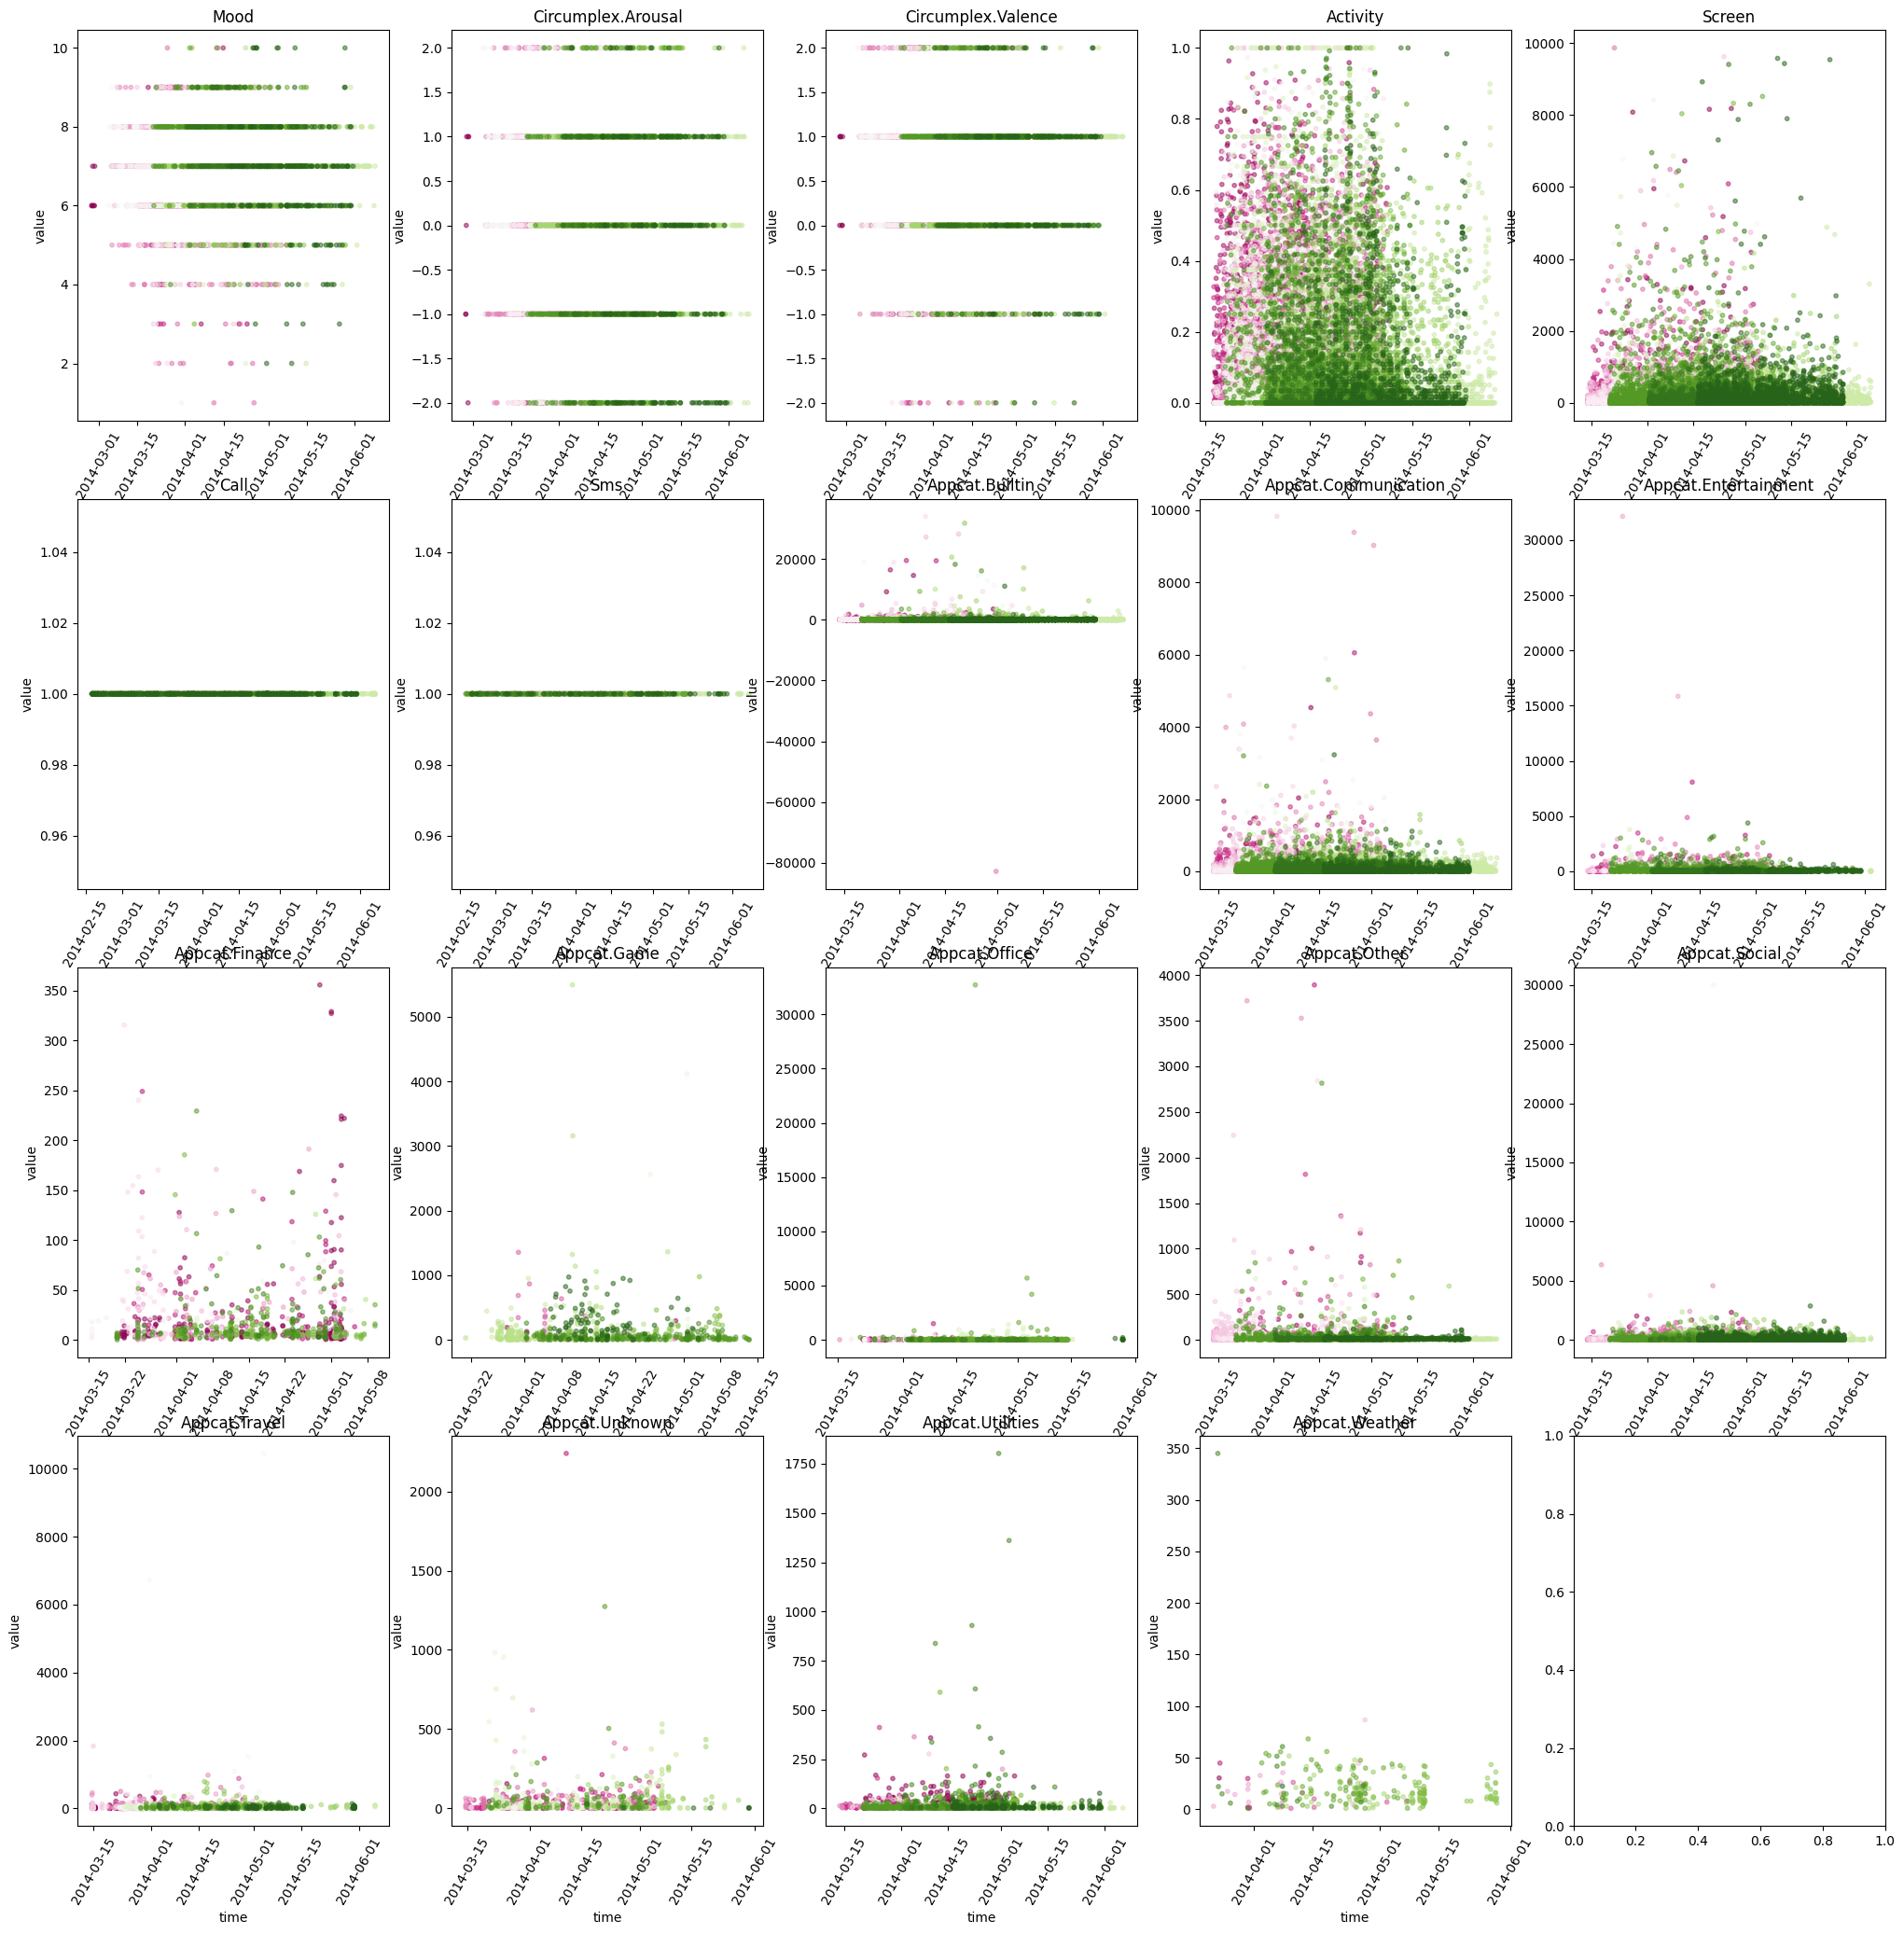

In [7]:
# Distributions of the variables color coded for different individuals
enc = LabelEncoder()
enc.fit(df.id.unique())

fig, axs = plt.subplots(4, 5, figsize=(25, 25))
for var, ax in zip(df.variable.unique(), axs.flatten()[:19]):
    df[df.variable==var].plot(x='time', y='value', kind='scatter', ax=ax,
                              c=enc.transform(df[df.variable==var].id),
                              cmap='PiYG', alpha=0.5, s=10, colorbar=False)
    ax.set_title(var.title())
    ax.tick_params('x', labelrotation=60)
plt.show()

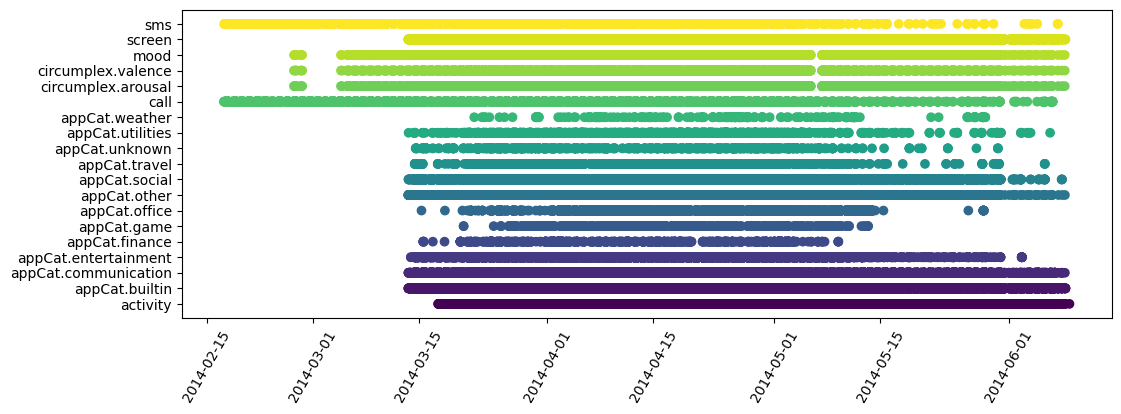

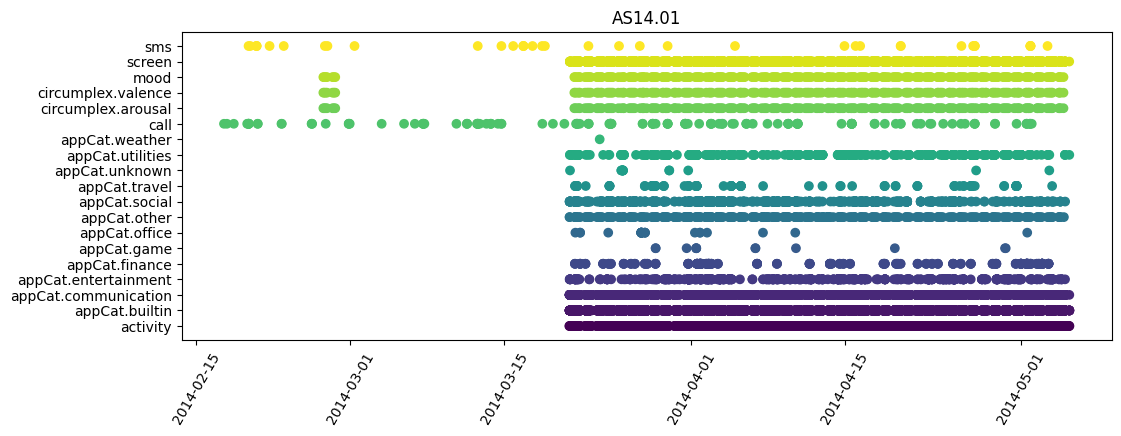

In [8]:
enc = LabelEncoder()
enc.fit(df.variable.unique())

def time_series(df, title=None):
    act = enc.transform(df.variable)
    plt.figure(figsize=(12, 4))
    plt.scatter(df.time, act, c=act)
    plt.title(title)
    plt.xticks(rotation=60)
    plt.yticks(range(len(enc.classes_)), enc.inverse_transform(range(len(enc.classes_))))
    plt.show()

time_series(df)
for ID in df.id.unique():
    time_series(df[df.id == ID], title=ID)
    break

## Data preprocessing

In [9]:
df = pd.read_csv("dataset_mood_smartphone.csv", index_col=0, parse_dates=["time"])

unclean = """screen
appCat.builtin
appCat.communication
appCat.entertainment
appCat.finance
appCat.game
appCat.office
appCat.other
appCat.social
appCat.travel
appCat.unknown
appCat.utilities
appCat.weather""".split('\n')

df = df.drop(index=df[df.variable=='appCat.office'].value.idxmax()) # Drop extreme value

unclean = df[df.variable.isin(unclean)]
outliers = unclean.groupby('variable').apply(lambda x: x.value.abs() > x.value.mean() + 3 * x.value.std())

df = df.drop(index=unclean[unclean.value < 0].index) # Drop all negative values
df = df.drop(index=outliers[outliers.values].index.get_level_values(1), errors='ignore') # drop outliers
df = df.dropna()

In [10]:
df_t = df
df_t['time'] = df_t.time.dt.round('30min')
pd.pivot_table(df_t, values='value', index=['id', 'time'], columns='variable', sort=False)

variable                     mood  circumplex.arousal  circumplex.valence   
id      time                                                                
AS14.01 2014-02-26 13:00:00   6.0                -1.0                 0.0  \
        2014-02-26 15:00:00   6.0                -1.0                 1.0   
        2014-02-26 18:00:00   6.0                 0.0                 1.0   
        2014-02-26 21:00:00   7.0                 1.0                 1.0   
        2014-02-27 09:00:00   6.0                -2.0                 0.0   
...                           ...                 ...                 ...   
AS14.33 2014-03-13 07:00:00   NaN                 NaN                 NaN   
        2014-03-13 11:30:00   NaN                 NaN                 NaN   
        2014-03-13 13:30:00   NaN                 NaN                 NaN   
        2014-05-24 02:30:00   NaN                 NaN                 NaN   
        2014-05-29 10:30:00   NaN                 NaN                 NaN   

variable                     activity  screen  call  sms  appCat.builtin   
id      time                                                               
AS14.01 2014-02-26 13:00:00       NaN     NaN   NaN  NaN             NaN  \
        2014-02-26 15:00:00       NaN     NaN   NaN  NaN             NaN   
        2014-02-26 18:00:00       NaN     NaN   1.0  NaN             NaN   
        2014-02-26 21:00:00       NaN     NaN   NaN  NaN             NaN   
        2014-02-27 09:00:00       NaN     NaN   NaN  NaN             NaN   
...                               ...     ...   ...  ...             ...   
AS14.33 2014-03-13 07:00:00       NaN     NaN   1.0  NaN             NaN   
        2014-03-13 11:30:00       NaN     NaN   1.0  NaN             NaN   
        2014-03-13 13:30:00       NaN     NaN   1.0  NaN             NaN   
        2014-05-24 02:30:00       NaN     NaN   NaN  NaN           2.304   
        2014-05-29 10:30:00       NaN     NaN   NaN  NaN          11.056   

variable                     appCat.communication  appCat.entertainment   
id      time                                                              
AS14.01 2014-02-26 13:00:00                   NaN                   NaN  \
        2014-02-26 15:00:00                   NaN                   NaN   
        2014-02-26 18:00:00                   NaN                   NaN   
        2014-02-26 21:00:00                   NaN                   NaN   
        2014-02-27 09:00:00                   NaN                   NaN   
...                                           ...                   ...   
AS14.33 2014-03-13 07:00:00                   NaN                   NaN   
        2014-03-13 11:30:00                   NaN                   NaN   
        2014-03-13 13:30:00                   NaN                   NaN   
        2014-05-24 02:30:00                   NaN                   NaN   
        2014-05-29 10:30:00                   NaN                   NaN   

variable                     appCat.finance  appCat.game  appCat.office   
id      time                                                              
AS14.01 2014-02-26 13:00:00             NaN          NaN            NaN  \
        2014-02-26 15:00:00             NaN          NaN            NaN   
        2014-02-26 18:00:00             NaN          NaN            NaN   
        2014-02-26 21:00:00             NaN          NaN            NaN   
        2014-02-27 09:00:00             NaN          NaN            NaN   
...                                     ...          ...            ...   
AS14.33 2014-03-13 07:00:00             NaN          NaN            NaN   
        2014-03-13 11:30:00             NaN          NaN            NaN   
        2014-03-13 13:30:00             NaN          NaN            NaN   
        2014-05-24 02:30:00             NaN          NaN            NaN   
        2014-05-29 10:30:00             NaN          NaN            NaN   

variable                     appCat.other  appCat.social 